# Equity Return Factor Analysis

**Goal:** To identify factors that explain why stocks outperform or underperform over time, using python for data processing, modeling, and visualization.

**Assets Analyzed** 
- Apple (AAPL)
- JPMorgan Chanse & Co (JPM)
- Exxon Mobil Corporation (XOM)

**Methods Used**
- CAPM
- Fama-French 3-Factor
- PCA

In [ ]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Project root and script path
PROJECT_ROOT = Path().resolve().parent
SCR_PATH = PROJECT_ROOT / "scr"
sys.path.append(str(SCR_PATH))

# Import custom scripts
from factor_modeling import download_factors, align_returns_factors, capm, ffm, pca, plot_pca_variance
from risk_analysis import vol, var, cumulative_returns, max_drawdown



Current working directory: d:\Equity Return Factor Analysis Project\equity_return_factor_analysis\notebook
Figures folder exists? False


## Load Data
For this project, I used daily adjusted close price. The factor data will be downloaded using our 'download_factors' function

In [48]:
# Load asset returns
returns = pd.read_csv(PROJECT_ROOT / "data/combined_returns.csv", index_col=0, parse_dates=True)

# Download factor data
factors = download_factors()

# Align returns and factors by common dates
returns, factors = align_returns_factors(returns, factors)

print("Aligned returns shape:", returns.shape)
print("Aligned factors shape:", factors.shape)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Factors shape: (2514, 4)
                 MKT       SMB       HML            RF
Date                                                  
2015-01-05 -0.018278  0.004690 -0.001001  1.190476e-07
2015-01-06 -0.008893 -0.007881  0.000669  7.936508e-07
2015-01-07  0.011630 -0.000147 -0.001328  7.936508e-07
2015-01-08  0.017888 -0.000783  0.000782  7.142857e-07
2015-01-09 -0.008404 -0.001590 -0.001632  5.952381e-07
Aligned returns shape: (2514, 3)
Aligned factors shape: (2514, 4)


## Exploratory Analysis
We now look at the basic statistics and visualize returns to understand the dataset.

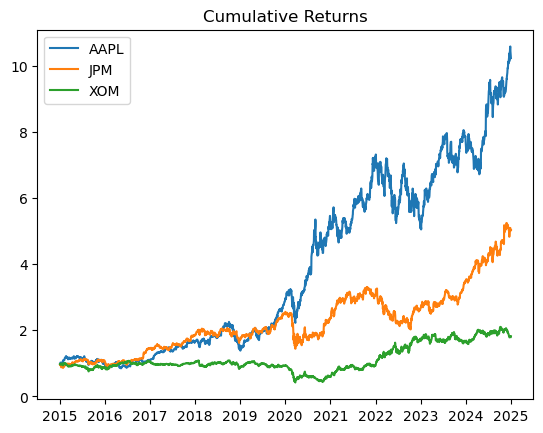

In [64]:
# Summary statistics
returns.describe()

# Plot cumulative returns for each asset
for col in returns.columns:
    plt.plot(cumulative_returns(returns[col]), label=col)
plt.title("Cumulative Returns")
plt.legend()

figures_path = "../figures"  # go up one level to project root
os.makedirs(figures_path, exist_ok=True)

plt.savefig(f"{figures_path}/cumulative_returns.png")
plt.show()

### CAPM

We compute alpha and beta for each asset using the Capital Asset Pricing Model.


In [65]:
capm_results = capm(returns, factors)
capm_results

,Alpha,Beta
AAPL,0.000442,1.192493
JPM,0.000187,1.107361
XOM,-0.000090,0.854571


### Fama-French 3-Factor Model

We extend CAPM by adding SMB and HML factors.


In [66]:
ffm_results = ffm(returns, factors)
ffm_results


,Alpha,Beta_MKT,Beta_SMB,Beta_HML
AAPL,0.000326,1.072791,-0.193184,-0.613531
JPM,0.000331,1.285035,0.183652,0.862945
XOM,0.000056,1.061635,0.131697,0.967573


### Principal Component Analysis (PCA)

We extract the main driving factors from returns using PCA.


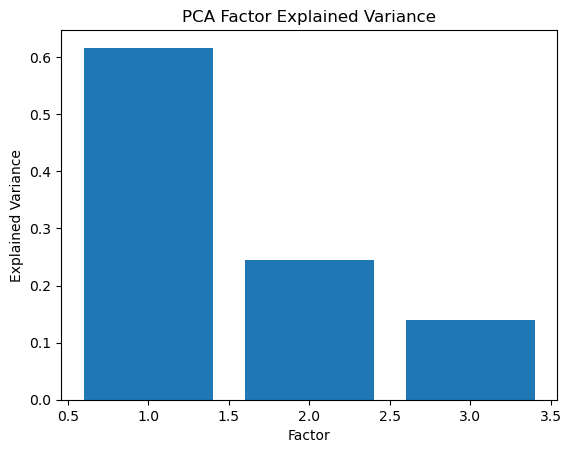

In [67]:
eig_vals, eig_vecs = pca(returns, n_factors=3)
plot_pca_variance(eig_vals)


## Risk Metrics

We compute volatility, Value at Risk (VaR), cumulative returns, and maximum drawdowns.


Volatility:
 AAPL    0.284670
JPM     0.273755
XOM     0.277881
dtype: float64

5% VaR:
 AAPL   -0.026996
JPM    -0.025339
XOM    -0.025922
Name: 0.05, dtype: float64


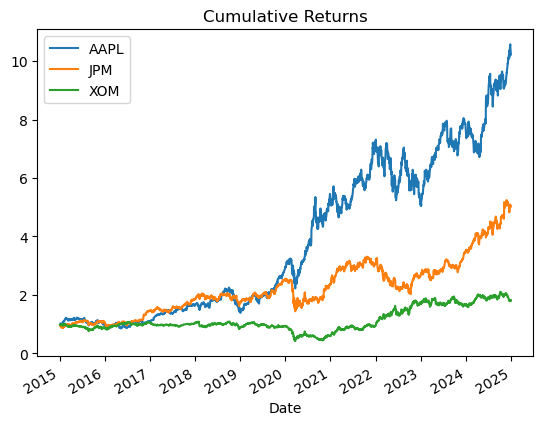


Max Drawdown:
 AAPL   -0.385159
JPM    -0.436265
XOM    -0.610066
dtype: float64


In [68]:
# Volatility
volatility = vol(returns)
print("Volatility:\n", volatility)

# VaR
var_5 = var(returns)
print("\n5% VaR:\n", var_5)

# Cumulative returns
cum_returns = cumulative_returns(returns)
cum_returns.plot(title="Cumulative Returns")
plt.show()

# Maximum Drawdown
drawdowns = returns.apply(max_drawdown)
print("\nMax Drawdown:\n", drawdowns)


## Conclusion

Summarize key findings:

- Which factors had the strongest impact on returns? (from CAPM/FFM)
- How much variance is explained by PCA factors?
- Risk metrics for each asset
- Suggestions for future work or analysis
